# Chapter 2. Training Machine Learning Algorithms for Classification

앞서 supervised learning을 설명하면서       
label이 범주형 변수일 경우 <u>Classification</u> problem이고,      
label이 연속일 경우 <u>Regression</u> problem이라고 했었다.

Chapter2에서는 <u>Classification</u> 알고리즘 중 (아주) 고전이라고 할 수 있는        
**Perceptrons**와 **Adaptive linear neurans**에 대해서 알아보고,        
기본적인 최적화(optimization) 기법에 대해서도 알아보자.     
(Classification problem에 대한 connectionist적 관점에서의 접근)

### Perceptrons

###### <u>Artificial neurons</u>

> An **artificial neuron** is a <u>mathematical function</u> conceived as a model of <u>biological neurons</u>. Artificial neurons are the constitutive units in an artificial neural network. Depending on the specific model used they may be called a <u>semi-linear unit, Nv neuron, binary neuron, linear threshold function, or McCulloch–Pitts (MCP) neuron.</u>
<div align="right">Reference: https://en.wikipedia.org/wiki/Artificial_neuron</div>

'어떤 입력들이 들어오고 이들을 종합하여 어떤 출력을 내놓는 것'을 표현할 수 있는 다양한 방법이 있다. 우선 수학적으로는 y = f(x1, x2, ..., xp)와 같은 함수를 생각해볼 수 있다.

인공지능과 뇌과학 분야에서는 두뇌에서 일어나는 연산/판단 과정을 알아내기 위해 다양한 시도를 했는데, 뉴런을 어떤 수학적 함수로 표현하는 하는 것도 그런 시도들 중 하나였다.

<img  src="./_images/02_artificial_neurons.PNG"/>

이렇게 생물학적 neuron을 수학적 함수로 표현하는 시도 중 하나가 **Artificial neuron**인데, Warren McCullock and Walter Pits가 1943년 고안한 것으로 **McCulloch–Pitts (MCP) neuron**이라고도 부른다.(멕컬릭 엔 핏츠 뉴런)

artificial neuron에 대한 기본 아이디어는 뉴런이 여러 다양한 입력을 받아 어떤 계산을 하고 그 계산의 합(혹은 함수의 출력값)이 어떤 임계치보다 크면 어떤 1을 내보내고, 임계치($\theta$) 보다 작을 경우 -1을 출력으로 내보내는 것이다.

이것을 수학적으로 표현하면 하나의 뉴런에 들어오는 다양한 입력 각각을 $x_1, x_2, \dots, x_p$이라 하고        
이들의 연산이 단순히 가중합(weighted sum)이라 가정하면 그 연산 합은 아래와 같다.
$$z = x_1 w_1 + x_2 w_2 + \dots + x_p w_p$$

이때 z가 임계치를 넘느냐 넘지 않느냐에 따라 아래와 같이 표현할 수 있다. 
$$z = \sum_{i} x_i w_i$$   
$$\phi(z) = \begin{cases} 1 & \rm{if} ~ z \geq \theta \\ -1 & \rm{otherwise}
\end{cases}$$

혹은 임계치를 bias로 바꿔서 표현할 수 도 있다.($\theta = -b$)    
$$z = b + \sum_{i} x_i w_i$$   
$$\phi(z) = \begin{cases} 1 & \rm{if} ~ z \geq 0 \\ -1 & \rm{otherwise}
\end{cases}$$


이를 그래프로 아래와 같이 나타낼 수 있다. 
이런 판단을 하는 함수를 activation function이라 부름, 수학적으로는 sign function이라 부름.

<img  src="./_images/02_artificial_neurons_graph.PNG"/>

위 함수의 입력과 출력과의 관계는       
weight($w_1, w_2, \dots , w_p$)들이 정해져 있을 때,                
어떤 데이터 값들에는 1을 출력하고,       
다른 데이터 값들에는 -1을 출력하고 있다.     
즉 입력들을 두개의 그룹으로 나누고 있다는 것을 알 수 있다.  

예를들어 입력 변수가 $x_1$과 $x_2$으로 두개만 있고    
데이터도 아래의 단 두건만 있다고 가정해 보자.
$$\mathbf{X} = \left(
\begin{array}{c}
1 & 1\\
2 & 1\\
\end{array}
\right)$$

그때의 함수 $w_1 x_1 + w_2 x_2 > \theta$, $x_2 > \frac{\theta}{w_2} - \frac{w_1}{w_2}x_2$는 어떤 직선으로서      
입력들을 두개의 그룹으로 나누는 직선이다.      

그렇다면 어떻게 적절한 $w_1$과 $w_2$값을 찾을 수 있을까?     
(결국 모델을 학습시킨다는 것은 이 $w_1$과 $w_2$을 찾는 것이다.)

어떻게 $w_1$과 $w_2$찾을 수 있을까? 
- 해석적 접근: 닫힌 해(Closed form solution)
$$w_1 + w_2 > \theta\\, 2w_1 + w_2 < \theta$$
<br>
$$w_1 <  0, w_2 > \theta$$

- 반복적 방법(Iterative method)      
-- 뉴튼 랩슨법(Newton-Raphson method)       
-- 최대 우도 경사 하강법(ML gradient ascent methods)     
-- ... 등등  

###### <u>Perceptron learning rule</u>

weight($w$)들을 찾는 반복적 방법(모형을 학습시키는 방법)으로 1957년 F.Rosenblatt가 제안한 방법으로 **Perceptrons**가 있다. 

> 1. 모든 weight($w_1, w_2, \dots , w_p$)들을 0으로 초기화
> 2. 각 데이터 건에 대하여 잘 예측했다면 $w_j$를 변경하지 않음  
잘못 예측했다면 $w_j$를 $x_j$에 비례하여 감소
$$w_j := w_j + \eta ( y^{(i)} - y^{(i)}) x_j^{(i)}$$

> 3. 더 이상 weight들의 (큰) 변화가 없을 때까지 2를 반복



Perceptrons가 나왔을 당시만해도 대단히 충격적이고 멋진 방법론이었으나...      
linearly sperable 하지 않은 문제는 풀수 없다는 치명적인 단점이 있다.    
(현실의 문제는 대부분 linearly sperable 하지 않음)  

###### <u>Implementing a perceptron</u>

iris data에서 꽃잎의 두가지 특성(petal length, sepal length)을 근거로    
setosa와 versicolor 구분하는 문제를 Perceptron을 이용해 구현해보자.

전체 학습 과정은 전체 데이터에 대해 weight을 update하는 과정을 n_iter번 반복하게 되고,    
각 반복에서의 miss-classification 수를 관찰한다.

In [38]:
import numpy as np
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

> fit 함수에서는 각 data record에 대해 아래식과 같이 weight들을 update한다.    
(bias term($w_0$)의 경우 1을 곱함)
$$w_j := w_j + \eta ( y^{(i)} - y^{(i)}) x_j^{(i)}$$

In [51]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


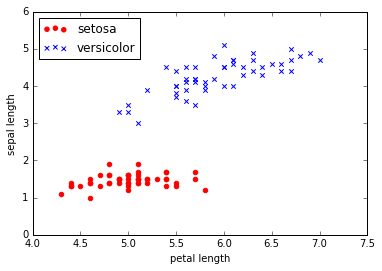

In [40]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

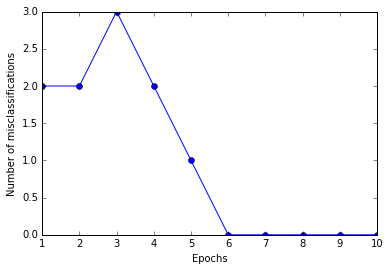

In [41]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

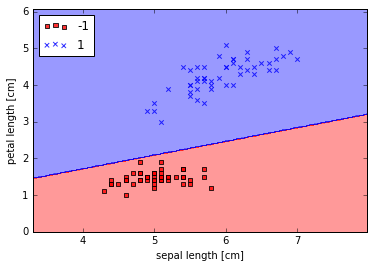

In [49]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
        

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()